# Figure 3A: Recombination Results, pi/pi_0 ratio

In [1]:
import sys
import os
import logging
import time
import argparse
import warnings

import numpy as np
import dadi
import dadi.DFE as DFE
import Selection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats 
from matplotlib.lines import Line2D

# General Figure inputs

In [3]:
title_conditions={'SLiM_True_DFE':'True model', 'Neutral':'s=0, r=1e-8', 'E5':'s=1e-05, r=1e-8', 'E4':'s=1e-4, r=1e-8',
                  'E3': 's=1e-3, r=1e-8', 'E5_Partial':'s=1e-5,r=1e-8' ,'E3_Partial':'s=1e-3, r=1e-8', 
                  'E4_Partial':'s=1e-4, r=1e-8', 'Zero_Recom7':'s=0, r=1e-7', 'Zero_Recom6':'s=0, r=1e-6',
                 'E3_Partial_R7':'s=1e-3, r=1e-7','E3_Partial_R6':'s=1e-3, r=1e-6', 'E4_Partial_R6':'s=1e-4, r=1e-6','E4_Partial_R7':'s=1e-4, r=1e-7',
                 'E5_Partial_R7':'s=1e-5, r=1e-7','E5_Partial_R6':'s=1e-5, r=1e-6', 'E3_Recom7':'s=1e-3, r=1e-7', 'E3_Recom6':'s=1e-3, r=1e-6', 
                  'E4_Recom6':'s=1e-4, r=1e-6', 'E4_Recom7':'s=1e-4, r=1e-7', 'E5_Recom7':'s=1e-5, r=1e-7', 'E5_Recom6':'s=1e-5, r=1e-6'}

In [4]:
color_conditions={'SLiM_True_DFE':'#99b3ff', 'Neutral':'#3366ff', 'Zero_Recom7':'#668CFF', 'Zero_Recom6':'#99B3FF', 
                  'E5':'#267326', 'E5_Recom7':'#5C965C','E5_Recom6':'#93B993',
                  'E4':'#9bc238','E4_Recom7':'#B4D16A','E4_Recom6':'#CDE19B',
                  'E3': '#7D2FB9', 'E3_Recom7':'#9E63CB','E3_Recom6':'#BE97DC',
                  'E5_Partial':'#cc0000' ,'E5_Partial_R7':'#D94040','E5_Partial_R6':'#E68080',
                  'E3_Partial':'#E6BE00','E3_Partial_R7':'#EFD660','E3_Partial_R6':'#F6E79F', 
                  'E4_Partial':'#ff6600', 'E4_Partial_R7':'#FF8C40','E4_Partial_R6':'#FFB380'}

In [5]:
model_tips={'OneEpoch':'o', 'TwoEpoch':'X'}

# Panel A: Pi/Pi_0

## Compute pi_0

In [6]:
mu=1.5E-8#Mutation rate
N=10000
L=32190668.8
mu_length=mu*L
mu_nonsyn=0.6979*mu_length
pi_0=4*N*mu_nonsyn

In [7]:
print(pi_0)

13479.520653311998


## Compute pi for each condition

In [8]:
conditions_to_test=['0', 'E3', 'E4', 'E5', 'PartialE3', 'PartialE4', 'PartialE5']

In [9]:
pi_ratios=[]
conditions=[]
empirical_pis=[]

for condition in conditions_to_test:
    for i in range(20):
        nonsyn_input_sfs = '/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/Summed_SFS/NonSyn_SFS_DadiInput_'+condition+'_Replicate'+str(i+1)+'.txt'
        nonsyn_data = dadi.Spectrum.from_file(nonsyn_input_sfs)
        empirical_pi=nonsyn_data.pi()
        ratio=empirical_pi/pi_0
        pi_ratios.append(ratio)
        conditions.append(condition)
        empirical_pis.append(empirical_pi)

In [10]:
piratio_df=pd.DataFrame.from_dict({'condition':conditions, 'pi_ratio':pi_ratios})

## Make figure

In [11]:
#Replace the condition values with the correct label
piratio_df.loc[piratio_df['condition'] == '0', 'condition'] = 'Neutral'
piratio_df.loc[piratio_df['condition'] == 'PartialE3', 'condition'] = 'E3_Partial'
piratio_df.loc[piratio_df['condition'] == 'PartialE4', 'condition'] = 'E4_Partial'
piratio_df.loc[piratio_df['condition'] == 'PartialE5', 'condition'] = 'E5_Partial'

#Sort the dataframe 
order_plotting=['Neutral', 'E5', 'E4', 'E3', 'E5_Partial', 'E4_Partial', 'E3_Partial']  # Your custom sorting order
sorting_dict = {val: idx for idx, val in enumerate(order_plotting)}
piratio_df = piratio_df.sort_values('condition', key=lambda x: x.map(sorting_dict))

In [12]:
title_conditions={'SLiM_True_DFE':'True model', 'Neutral':'s=0', 'E5':'s=1e-5', 'E4':'s=1e-4',
                  'E3': 's=1e-3', 'E5_Partial':'22% at s=1e-05' ,'E3_Partial':'22% at s=1e-03', 
                  'E4_Partial':'22% at s=1e-04'}

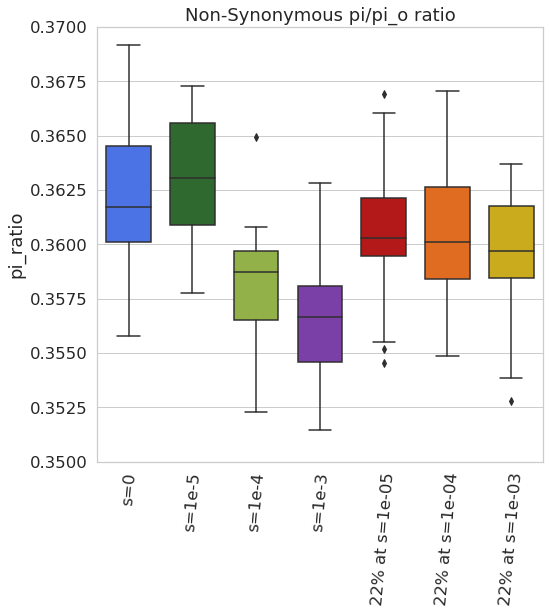

In [13]:
sbn.set(font_scale=1.5, style='whitegrid')
plt.figure(figsize=[8,8])
ax=sbn.boxplot(data=piratio_df, x="condition", y="pi_ratio", hue="condition", palette=color_conditions, width=0.7, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.35, 0.37)
plt.title("Non-Synonymous pi/pi_o ratio")

ax.set_xticklabels([title_conditions[label] for label in order_plotting])
plt.xticks(rotation=85)
plt.xlabel("")
ax.get_legend().remove()

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/Fig3_A.jpg", bbox_inches='tight', dpi=300)

# Supplementary Figure 7

In [14]:
mu=1.5E-8#Mutation rate
N=10000
L=9728061
mu_length=mu*L
#mu_syn=0.3020*mu_length
pi_0=4*N*mu_length

In [15]:
print(pi_0)

5836.8366


## Compute pi for each condition

In [19]:
conditions_to_test=['0', 'E3', 'E4', 'E5', 'PartialE3', 'PartialE4', 'PartialE5']

In [17]:
pi_ratios=[]
conditions=[]
empirical_pis=[]

for condition in conditions_to_test:
    for i in range(20):
        syn_input_sfs = '/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/Summed_SFS/Syn_SFS_DadiInput_'+condition+'_Replicate'+str(i+1)+'.txt'
        syn_data = dadi.Spectrum.from_file(syn_input_sfs)
        empirical_pi=syn_data.pi()
        ratio=empirical_pi/pi_0
        pi_ratios.append(ratio)
        conditions.append(condition)
        empirical_pis.append(empirical_pi)

In [18]:
piratio_df=pd.DataFrame.from_dict({'condition':conditions, 'pi_ratio':pi_ratios})

## Make Figure

In [20]:
#Replace the condition values with the correct label
piratio_df.loc[piratio_df['condition'] == '0', 'condition'] = 'Neutral'
piratio_df.loc[piratio_df['condition'] == 'PartialE3', 'condition'] = 'E3_Partial'
piratio_df.loc[piratio_df['condition'] == 'PartialE4', 'condition'] = 'E4_Partial'
piratio_df.loc[piratio_df['condition'] == 'PartialE5', 'condition'] = 'E5_Partial'

#Sort the dataframe 
order_plotting=['Neutral', 'E5', 'E4', 'E3', 'E5_Partial', 'E4_Partial', 'E3_Partial']  # Your custom sorting order
sorting_dict = {val: idx for idx, val in enumerate(order_plotting)}
piratio_df = piratio_df.sort_values('condition', key=lambda x: x.map(sorting_dict))

In [21]:
title_conditions={'SLiM_True_DFE':'True model', 'Neutral':'s=0', 'E5':'s=1e-5', 'E4':'s=1e-4',
                  'E3': 's=1e-3', 'E5_Partial':'22% at s=1e-05' ,'E3_Partial':'22% at s=1e-03', 
                  'E4_Partial':'22% at s=1e-04'}

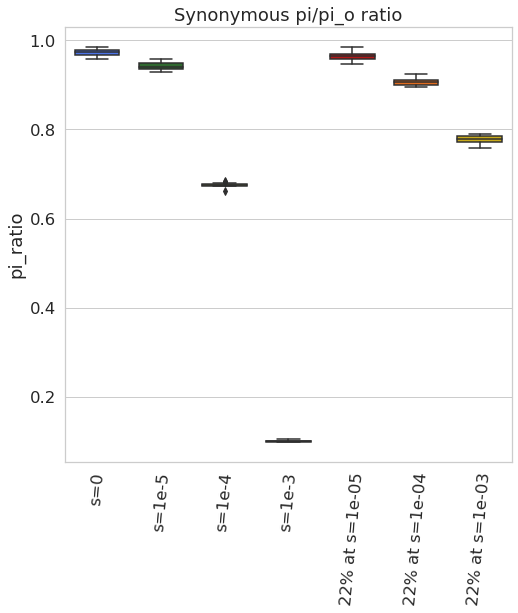

In [23]:
sbn.set(font_scale=1.5, style='whitegrid')
plt.figure(figsize=[8,8])
ax=sbn.boxplot(data=piratio_df, x="condition", y="pi_ratio", hue="condition", palette=color_conditions, width=0.7, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0.35, 0.37)
plt.title("Synonymous pi/pi_o ratio")

ax.set_xticklabels([title_conditions[label] for label in order_plotting])
plt.xticks(rotation=85)
plt.xlabel("")
ax.get_legend().remove()

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SuppFig7.jpg", bbox_inches='tight', dpi=300)